## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. 

In [2]:
import sys
sys.path.append('..')
from utils.pipeline import prepare_features, train_model, predict_unlabeled, plot_metric_by_strategy
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
unlabeled_df = pd.read_csv('../input/unlabeled.csv')

## Step-by-step checklist:

1. Prepare Features
    - Separate features (X) and target (y)

2. Logistic Regression Baseline
    - Train a simple model using logistic regression
    - Evaluate metrics such as accuracy, precision, recall, F1-score and AUC-ROC

3. Random Forest
    - Train a more complex model using Random Forest
    - Use GridSearchCV for hyperparameter tuning
    - Evaluate the same metrics as in step 3

4. Cross-validation
    - Use StratifiedKFold to ensure stability in metrics

5. Visualize results
    - Create visualizations to compare the results of class balancing

5. Final usage
    - Apply the best model and save the results (ID, Possibility of being a Team Rocket member and Predicted Class)

In [3]:
# Preparing features
X_train, y_train, fitted_columns = prepare_features(train_df, is_train=True)
X_test, y_test, _ = prepare_features(test_df, is_train=True)

### Since the target variable is less than 20%, we need to use some techniques to avoid issues.

**If not, the model can just always predict the majority class and get a high accuracy.**

To deal with class inbalance, we can use techniques like:
-  ```LogisticRegression(class_weight='balanced')``` to give more focues to the minority class.

- Oversampling the minority class with **SMOTE** (Synthetic Minority Over-sampling Technique)

- Undersampling the majority class with **RandomUnderSampler**

- Use metrics that take into account class inbalance, such as **precision**, **recall**, **F1 score** or **AUC-ROC**.

To evaluate which of these techniques best applies to our dataset, let's run a comparison between them:

1. Base
2. With class_weight='balanced'
3. With SMOTE
4. With Undersampling
5. Combination of techniques

For each of these, we wil be comparing

- Accuracy
- Precision
- Recall
- F1 Score
- AUC-ROC

## Logistic Regression


In [10]:
lr_model =LogisticRegression(solver="saga", max_iter=7000)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1 AUC-ROC: 0.781


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2 AUC-ROC: 0.791


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3 AUC-ROC: 0.811


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4 AUC-ROC: 0.845


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5 AUC-ROC: 0.800

Mean CV AUC-ROC: 0.805 (+/- 0.022)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       656
           1       0.48      0.51      0.49       144

    accuracy                           0.81       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.82      0.81      0.81       800


🧩 Confusion Matrix:
[[577  79]
 [ 71  73]]

🎯 Test Set AUC-ROC: 0.791


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


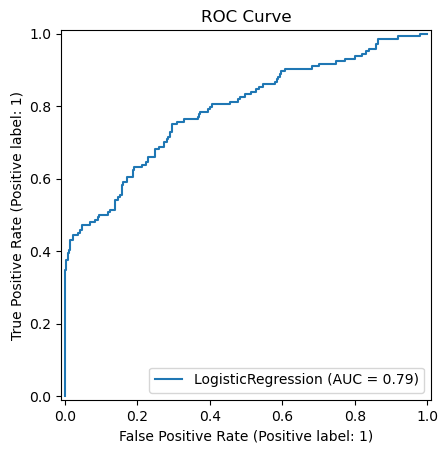

(LogisticRegression(max_iter=7000, solver='saga'), 0.8054622021595526)

In [ ]:
# Base model with no balancing techniques
train_model(lr_model, X_train, X_test, y_train, y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1 AUC-ROC: 0.851


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2 AUC-ROC: 0.845


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3 AUC-ROC: 0.865


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4 AUC-ROC: 0.892


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5 AUC-ROC: 0.880

Mean CV AUC-ROC: 0.867 (+/- 0.018)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       656
           1       0.40      0.82      0.54       144

    accuracy                           0.74       800
   macro avg       0.67      0.77      0.68       800
weighted avg       0.85      0.74      0.77       800


🧩 Confusion Matrix:
[[477 179]
 [ 26 118]]

🎯 Test Set AUC-ROC: 0.860


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


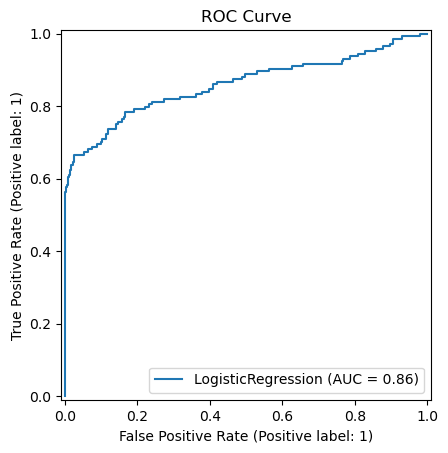

(LogisticRegression(class_weight={0: 0.6095238095238096, 1: 2.782608695652174},
                    max_iter=7000, solver='saga'),
 0.8667956097741751)

In [12]:
# With class weight
train_model(lr_model, X_train, X_test, y_train, y_test, use_class_weight = True)


In [ ]:
# With SMOTE
train_model(lr_model, X_train, X_test, y_train, y_test, use_smote = True)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1 AUC-ROC: 0.887


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2 AUC-ROC: 0.879


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3 AUC-ROC: 0.891


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4 AUC-ROC: 0.914


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5 AUC-ROC: 0.907

Mean CV AUC-ROC: 0.895 (+/- 0.013)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1 AUC-ROC: 0.852


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2 AUC-ROC: 0.846


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3 AUC-ROC: 0.865


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4 AUC-ROC: 0.892


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5 AUC-ROC: 0.882

Mean CV AUC-ROC: 0.867 (+/- 0.018)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       656
           1       0.41      0.81      0.54       144

    accuracy                           0.76       800
   macro avg       0.68      0.78      0.69       800
weighted avg       0.85      0.76      0.78       800


🧩 Confusion Matrix:
[[487 169]
 [ 27 117]]

🎯 Test Set AUC-ROC: 0.861


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


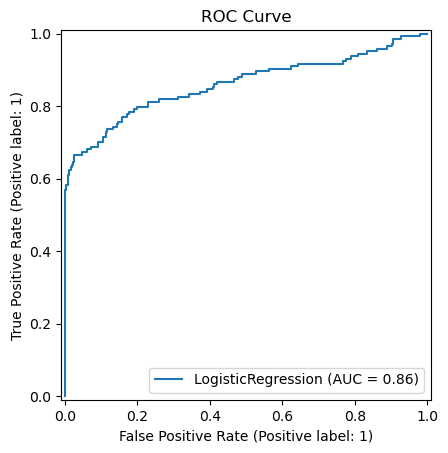

(LogisticRegression(class_weight={0: 1.0, 1: 1.0}, max_iter=7000, solver='saga'),
 0.867323713552166)

In [ ]:
# With SMOTE and Class Weight
train_model(lr_model, X_train, X_test, y_train, y_test, use_smote = True , use_class_weight=True)

### **What can we learn from these results?**
- No balancing techniques:
    - The model has high precision and recall for class 0 (around 90%), meaning it is good at identifying non-Team Rocket members. 
    - Low precision and recall for class 1 (around 0.5), indicating that it may not be very effective at identifying Team Rocket members.
    - Confusion Matrix confirms the previous metrics
    - AUC-ROC score of 0.79 indicates that the model is performing better than random chance, but not outstandingly well. 

- With class_weight="balanced":
    - Model improved significantly on class 1 detection (recall from 0.5 to 0.82)
    - Low precision for class 1 (around 0.4), indicating there are still false positives.
    - Class 0 had a drop in recall (from 0.87 to 0.73) which is expected due to the balancing technique
    - Confusion Matrix shows the model identifies a lot more real Rocket members but with more false positives
    - AUC-ROC score increased to 0.86, a significant improvement

- With SMOTE:
    - Similar to class_weight, with recall reaching 0.81 and precision at 0.41
    - Class 0 also very similar, with recall of 0.74
    - AUC-ROC exactly the same

- With class_weight="balanced" & SMOTE:
    - Extremely similar results, probably because SMOTE is already balancing the classes well


## Random Forest

### Let's try GridSearchCV to test out different hyperparameters for Random Forest

In [ ]:
grid = {'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best parameters:', best_params)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [4]:
rf_model = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

### Testing different class balancing methods

Fold 1 AUC-ROC: 1.000
Fold 2 AUC-ROC: 0.992
Fold 3 AUC-ROC: 1.000
Fold 4 AUC-ROC: 0.993
Fold 5 AUC-ROC: 0.990

Mean CV AUC-ROC: 0.995 (+/- 0.004)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       1.00      0.99      0.99       144

    accuracy                           1.00       800
   macro avg       1.00      0.99      1.00       800
weighted avg       1.00      1.00      1.00       800


🧩 Confusion Matrix:
[[656   0]
 [  2 142]]

🎯 Test Set AUC-ROC: 0.997


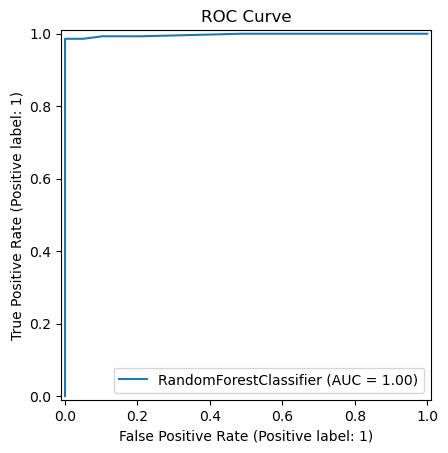

(RandomForestClassifier(bootstrap=False, random_state=42), 0.9949960846185413)

In [5]:
# No balancing
train_model(rf_model, X_train, X_test, y_train, y_test)

Fold 1 AUC-ROC: 1.000
Fold 2 AUC-ROC: 0.994
Fold 3 AUC-ROC: 1.000
Fold 4 AUC-ROC: 0.992
Fold 5 AUC-ROC: 0.995

Mean CV AUC-ROC: 0.996 (+/- 0.003)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       1.00      0.98      0.99       144

    accuracy                           1.00       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      1.00      1.00       800


🧩 Confusion Matrix:
[[656   0]
 [  3 141]]

🎯 Test Set AUC-ROC: 0.995


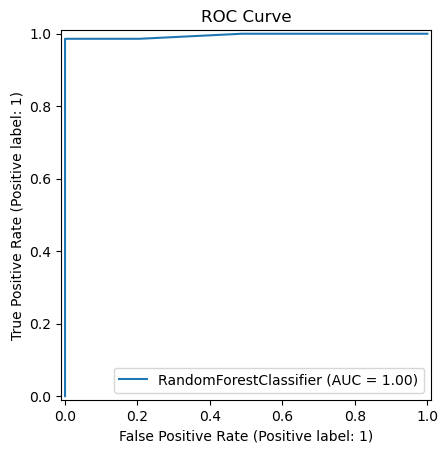

(RandomForestClassifier(bootstrap=False,
                        class_weight={0: 0.6095238095238096,
                                      1: 2.782608695652174},
                        random_state=42),
 0.9962662602722631)

In [6]:
# with class_weight
train_model(rf_model, X_train, X_test, y_train, y_test, use_class_weight=True)

Fold 1 AUC-ROC: 1.000
Fold 2 AUC-ROC: 0.994
Fold 3 AUC-ROC: 1.000
Fold 4 AUC-ROC: 0.995
Fold 5 AUC-ROC: 0.994

Mean CV AUC-ROC: 0.997 (+/- 0.003)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       656
           1       1.00      0.97      0.99       144

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      0.99       800


🧩 Confusion Matrix:
[[656   0]
 [  4 140]]

🎯 Test Set AUC-ROC: 0.995


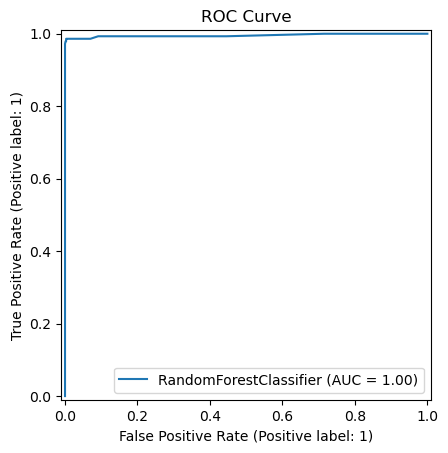

(RandomForestClassifier(bootstrap=False,
                        class_weight={0: 0.6095238095238096,
                                      1: 2.782608695652174},
                        random_state=42),
 0.9966406696869669)

In [7]:
# With SMOTE
train_model(rf_model, X_train, X_test, y_train, y_test, use_smote=True)

Fold 1 AUC-ROC: 1.000
Fold 2 AUC-ROC: 0.992
Fold 3 AUC-ROC: 1.000
Fold 4 AUC-ROC: 0.987
Fold 5 AUC-ROC: 0.993

Mean CV AUC-ROC: 0.994 (+/- 0.005)

📋 Final Test Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       1.00      0.98      0.99       144

    accuracy                           1.00       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      1.00      1.00       800


🧩 Confusion Matrix:
[[656   0]
 [  3 141]]

🎯 Test Set AUC-ROC: 0.998


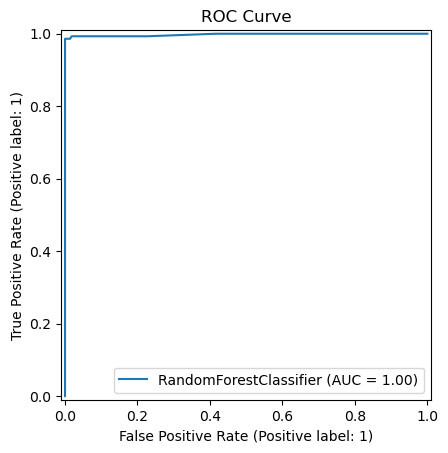

(RandomForestClassifier(bootstrap=False, class_weight={0: 1.0, 1: 1.0},
                        random_state=42),
 0.9944024801394287)

In [8]:
# With SMOTE and class_weight
train_model(rf_model, X_train, X_test, y_train, y_test, use_smote=True, use_class_weight=True)


### Key takeaways:
- Random Forest delivers **exceptional performance** even without balancing (**1.0** precision, **0.97** recall, **0.990** AUC-ROC)
- Class weighting and SMOTE do not significantly improve performance, the base model is already very strong.
- Random Forest is great at dealing with class inbalance


### Now, lets create simple visualizations to understand our metrics

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:168: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


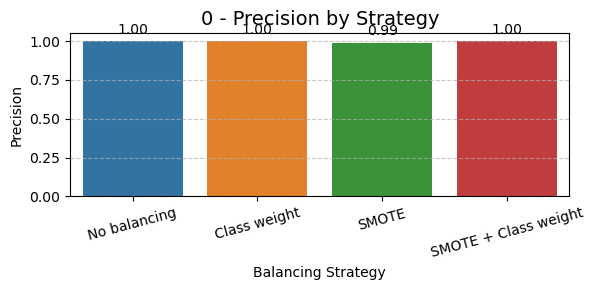

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:168: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


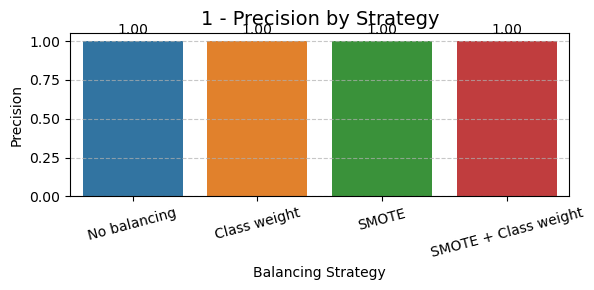

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:168: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


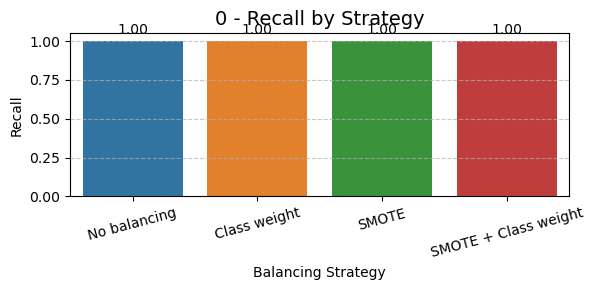

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:168: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


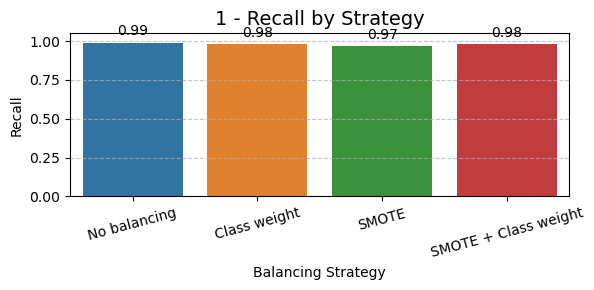

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:168: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


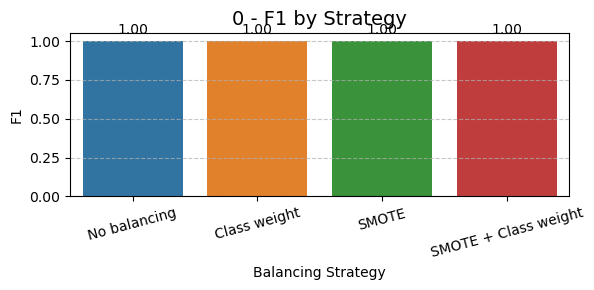

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:168: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


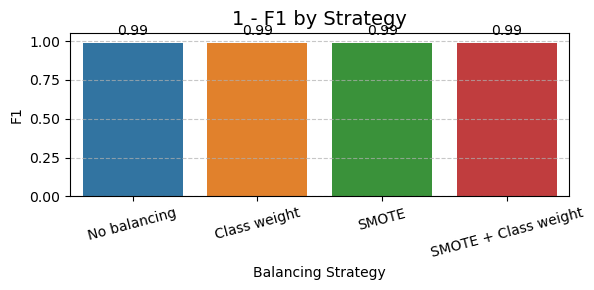

c:\Users\PC\OneDrive\Documentos\Projetos\pokemon-detective-ml-project\pokemon-detective-ml-project\notebooks\..\utils\pipeline.py:196: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


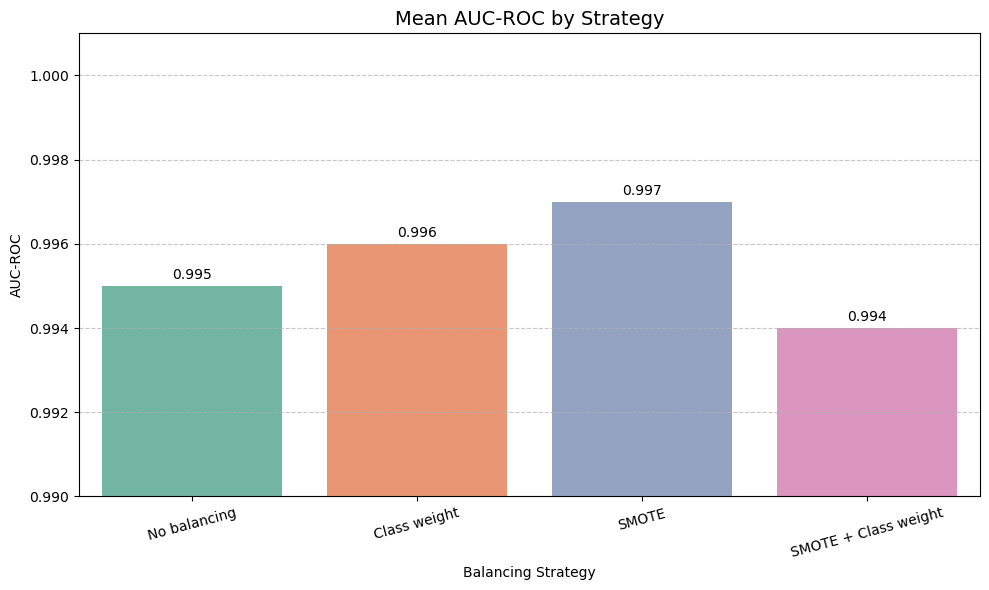

In [13]:
eval_df = pd.read_csv('../input/model_eval_comparison.csv')
plot_metric_by_strategy(eval_df)

## Since Random Forest is performing the best, we will use it to predict the unlabeled data

In [14]:
predict_unlabeled(rf_model, unlabeled_df, fitted_columns, output_path='../output')

✅ Predictions saved to 'predictions.csv'
